# Semivariogram Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = [16 / 1.5, 10 / 1.5]   # inch / cm = 2.54
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

##  Standard Models
A number of functions for modelling empirical variograms are provided through the module [svmodels.py](svmodels.py)

In [2]:
import svmodels

The first argument is the lag distance $X$, which can be provided as a scalar or a vector.

In [3]:
svrange=2500
svsill=1.
svnugget=0.1

# example for scalar input:
print("SV_Gaussian({}) = {}".format(100, svmodels.gaussian(100, svrange, svsill)))

SV_Gaussian(100) = 0.632120558829


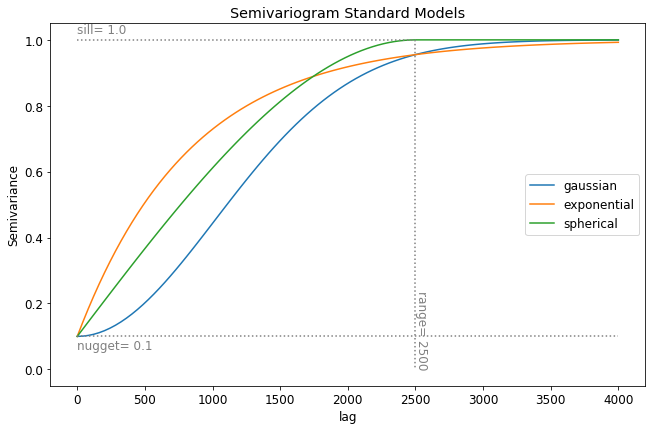

In [4]:
# example for vector input
X = np.linspace(0, 4000, 100)

Y = svmodels.gaussian(X, svrange, svsill, svnugget)  
plt.plot(X, Y, label="gaussian")

Y = svmodels.exponential(X, svrange, svsill, svnugget)  
plt.plot(X, Y, label="exponential")

Y = svmodels.spherical(X, svrange, svsill, svnugget)  
plt.plot(X, Y, label="spherical")

plt.plot((0, svrange, svrange),(svsill, svsill, 0), ":", c="grey")
plt.plot((0, 4000),(svnugget, svnugget), ":", c="grey")

plt.text(0,svsill+0.02,"sill= {:}".format(svsill),color="grey")
plt.text(svrange,0,"range= {:}".format(svrange), rotation=270, verticalalignment='bottom',color="grey")
plt.text(0,svnugget-0.04,"nugget= {:}".format(svnugget),color="grey")


plt.legend()
plt.title('Semivariogram Standard Models')
plt.ylabel('Semivariance')
plt.xlabel('lag')

_ = plt.show()

## Business Functions
### Instantiating Functions (freezing curve parameters)

The <code>instance_of</code> function returns an instance of that semivariogram model with all parameters fixed. This is simply to allow for easier usage of that function in later coding.
This function is provided for convenience and is identical to using a lambda function

```python
svmfct = lambda h, a=a, C0=C0: model( h )
```

In [8]:
mysvmodel = svmodels.instance_of(svmodels.gaussian, a=2500, C0=1., Cn=0.1)
print("mysvmodel({}) = {}".format(100, mysvmodel(100)))

#plt.plot(range(2500), mysvmodel(np.array(range(2500))))
#_ = plt.show()

mysvmodel(100) = 0.668908502946


## Experimental Semivariogram Functions
A number of non-standard functions are provided through the [svmodels.py](svmodels.py) module.

### Hole-Effect Model
Useful for 1D interpolation.

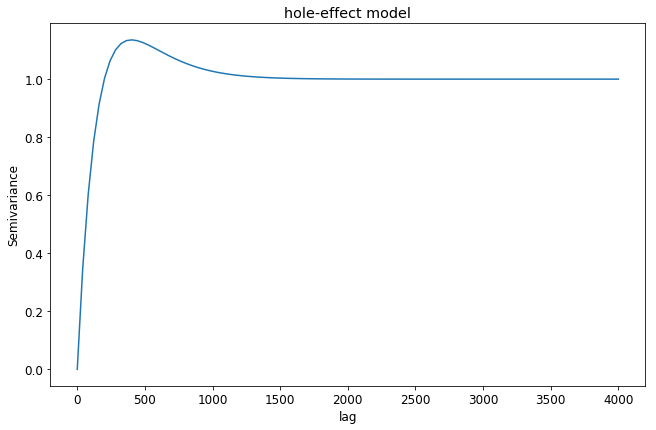

In [6]:
X = np.linspace(0,4000,100)
Y = svmodels.hole(X, 200, 1, 0.0)
plt.title('hole-effect model')
plt.ylabel('Semivariance')
plt.xlabel('lag')
plt.plot(X,Y)
plt.plot((0),(0))
_ = plt.show()

### Hole-Effect Model (2)
(Triki et al. p.1600 / Dowdall et al. 2003)

C:\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


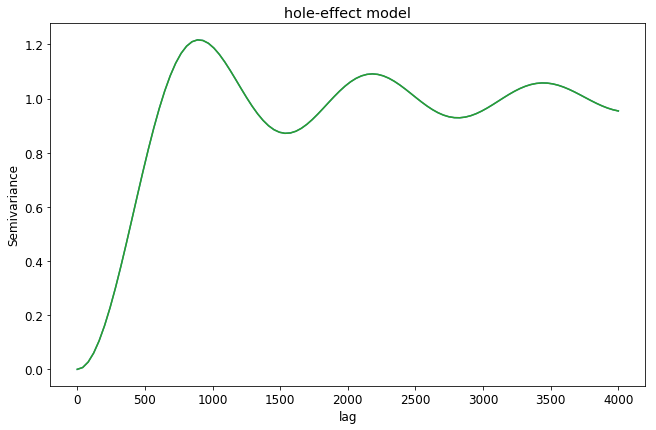

In [7]:
X = np.linspace(0,4000,100)
Y = svmodels.hole_N(X, 200, 1, 0.0)
plt.plot(X,Y)
plt.plot((0),(0))

plt.title('hole-effect model')
plt.ylabel('Semivariance')
plt.xlabel('lag')
plt.plot(X,Y)
plt.plot((0),(0))
plt.legend()
_ = plt.show()